# <center>Krystian Kierklo 162430 grupa 2 </center>
# <center>Zadania do wykonania </center>

### Zadanie 1

##### Wykonaj wszystkie kroki po kolei w celu stworzenia prostego klasyfikatora wykorzystującego regresję liniową. W tym celu zaimplementuj samodzielnie funkcje średniej, odchylenia standardowego, współczynnika korelacji Pearsona.
Posłuż się zbiorami danych x i y z omawianego przykładu. Dodatkowo przewidź wartości dla X=7 oraz X=8.

   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


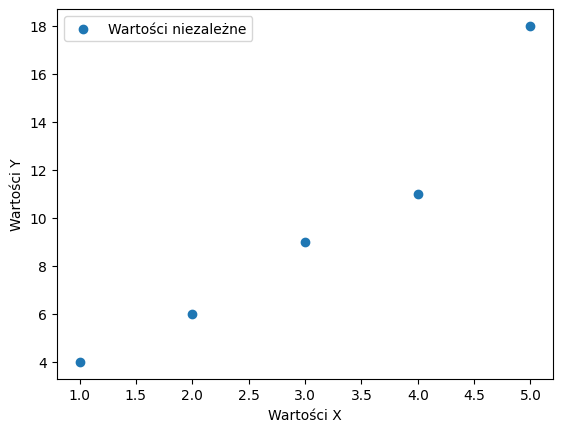

Mead x:  3.0
Mead y:  9.6
Standard deviation x:  1.5811388300841898
Standard deviation y:  5.412947441089743

n =  5

      X   Y   y2   xy  x2
0     1   4   16    4   1
1     2   6   36   12   4
2     3   9   81   27   9
3     4  11  121   44  16
4     5  18  324   90  25
sum  15  48  578  177  55
r=  0.963940292431027
----------PODSUMOWNIE------------
Mead x:  3.0
Mead y:  9.6 

Standard deviation x:  1.5811388300841898
Standard deviation y:  5.412947441089743 

Pearson correlation coefficient =  0.963940292431027 

b =  3.3
a =  -0.29999999999999893


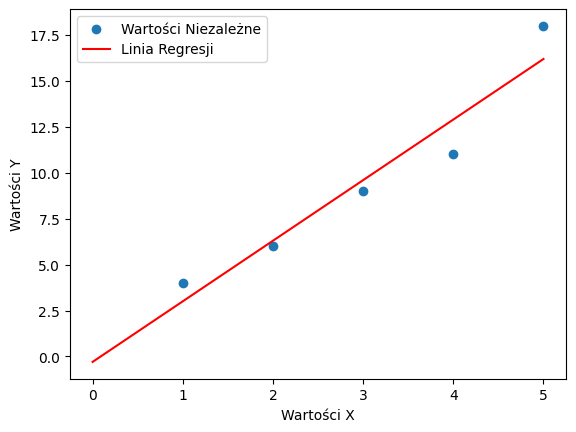

Df z 6:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0   NaN
Df z predicted:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
Df z 7:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
6  7.0   NaN
Df z predicted:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
6  7.0  22.8
Df z 8:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
6  7.0  22.8
7  8.0   NaN
Df z predicted:
      X     Y
0  1.0   4.0
1  2.0   6.0
2  3.0   9.0
3  4.0  11.0
4  5.0  18.0
5  6.0  19.5
6  7.0  22.8
7  8.0  26.1


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def srednia(zbior):
    if len(zbior) == 0:
        return 0
    else:
        return sum(zbior) / len(zbior)


def odchylenie(zbior, srednia):
    if len(zbior) == 0:
        return 0
    else:
        suma = 0
        for x in zbior:
            suma += (x - srednia) ** 2
        return np.sqrt(suma / (len(zbior) - 1))


def wsp_korelacji_persona(n, sum_xy, sum_x, sum_y, sum_2x, sum_2y):
    return (n * sum_xy - sum_x * sum_y)/np.sqrt((n * sum_2x - sum_x ** 2) * (n * sum_2y - sum_y ** 2))


def linia_regresji(a, b, x):
    return (b * x) + a

def predict_y(x, b, a):
    return b * x + a

df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]

print(df)
plt.scatter(df['X'], df['Y'], label="Wartości niezależne")
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

Mean_x = srednia(df['X'])
Mean_y = srednia(df['Y'])

print("Mead x: ", Mean_x)
print("Mead y: ", Mean_y)

Sx = odchylenie(df['X'], Mean_x)
Sy = odchylenie(df['Y'], Mean_y)

print("Standard deviation x: ", Sx)
print("Standard deviation y: ", Sy)


n = len(df['X'])

pearson = pd.DataFrame(df[:])
pearson['y2'] = df['Y'] * df['Y']
pearson['xy'] = df['X'] * df['Y']
pearson['x2'] = df['X'] * df['X']
pearson.loc['sum'] = pearson.sum()


print("\nn = ", n)
print()
print(pearson)

pearson_result = wsp_korelacji_persona(n, pearson.loc['sum', 'xy'], pearson.loc['sum', 'X'], pearson.loc['sum', 'Y'],
                                       pearson.loc['sum', 'x2'], pearson.loc['sum', 'y2'])

print("r= ", pearson_result)

print("----------PODSUMOWNIE------------")
print("Mead x: ", Mean_x)
print("Mead y: ", Mean_y, "\n")
print("Standard deviation x: ", Sx)
print("Standard deviation y: ", Sy, '\n')
print("Pearson correlation coefficient = ", pearson_result, "\n")

b = pearson_result * (Sy / Sx)
a = Mean_y - b * Mean_x

print("b = ", b)
print("a = ", a)

x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label="Wartości Niezależne")
plt.plot(x, linia_regresji(a, b, x), 'r', label="Linia Regresji")
plt.xlabel("Wartości X")
plt.ylabel("Wartości Y")
plt.legend()
plt.show()


df = df._append({'X': 6, 'Y': np.nan}, ignore_index=True)
print("Df z 6:\n", df)


df.at[5, 'Y'] = predict_y(df['X'][5], b, a)
print("Df z predicted:\n", df)

df = df._append({'X': 7, 'Y': np.nan}, ignore_index=True)
print("Df z 7:\n", df)
df.at[6, 'Y'] = predict_y(df['X'][6], b, a) #Przewidzenie wartości dla X=7
print("Df z predicted:\n", df)

df = df._append({'X': 8, 'Y': np.nan}, ignore_index=True)
print("Df z 8:\n", df)
df.at[7, 'Y'] = predict_y(df['X'][7], b, a) #Przewidzenie wartości dla X=8
print("Df z predicted:\n", df)

